In [10]:
from fbm import FBM
import numpy as np
from matplotlib import pyplot as plt

In [69]:
import importlib
import muravlev_approximation
importlib.reload(muravlev_approximation)
from muravlev_approximation import fbm_muravlev
from hurst_estimation import m_estimator, w_estimator

## Muravlev's method for fBM simulation

Let $\xi=(\xi_\beta)_{\beta>0}$ be a Gaussian process with zero mean and covariance function
$$
\mathrm{cov}(\xi_\alpha, \xi_\beta) = \frac{1}{\alpha+\beta}, \qquad \alpha,\beta>0.
$$

Let $B_t$ be a Brownian motion independent of $\xi$. Define the family of Ornstein-Uhlenbeck processes $Z^\beta = (Z_t^\beta)_{t\ge 0}$ driven by the same Brownian motion $B_t$:
$$
d Z_t^\beta = -\beta Z_t^\beta dt + d B_t, \qquad Z_0^\beta = \xi_\beta.
$$

Then for $H\in(0,\frac12)$ we have the following representation:
$$
B_t^H = c_H \int_0^\infty \beta^{-1/2-H} (Z_t^\beta - \xi_\beta) d \beta,
$$
where $c_H$ is some constant.

Simulation of the process for the uniform grid:
1. Take $\beta_j = j\Delta \beta, j=1,\dots,k$, and simulate the value of $\xi_{\beta_j}$ from the multivariate normal distribution. 

2. Simulate a trajectory of the Brownian motion at points $t_i = i\Delta t$, $i=0,\dots,n$.

3. Simulate $k$ OU processes with the above $\beta_j$ using Euler's scheme.

4. Approximate the integral by
$$
B_{t_i}^H \approx \sum_{j=1}^k \beta_j^{-1/2-H} Z_{t_i}^{\beta_j} \Delta \beta.
$$

#### Parameters

In [54]:
n = 4096
H = 0.4

#### Reference fBM

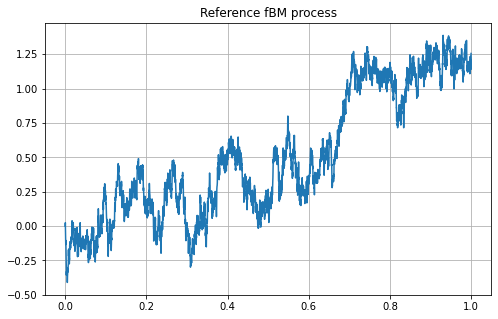

In [55]:
time_grid = np.linspace(0, 1, n+1)
ref_fbm = FBM(n=n, hurst=H, length=1, method='daviesharte').fbm()

_, ax = plt.subplots(figsize=(8, 5))
ax.plot(time_grid, ref_fbm)
ax.set_title("Reference fBM process")
ax.grid()

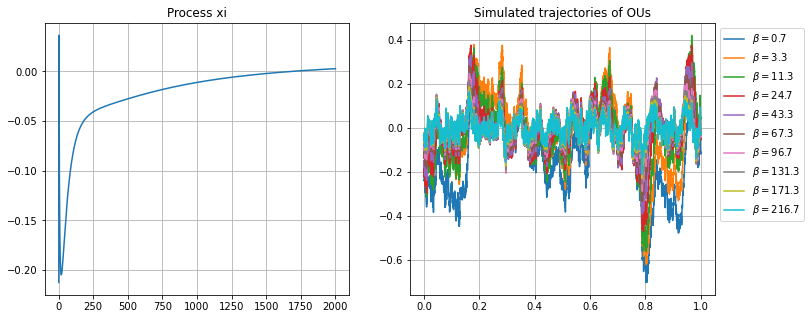

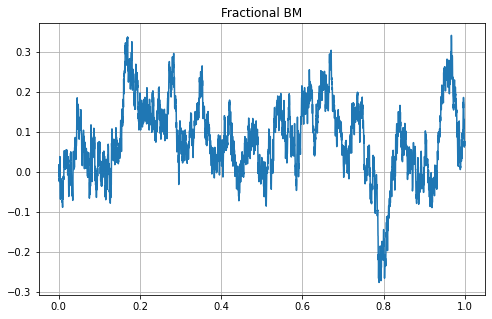

In [70]:
muravlev_fbm = fbm_muravlev(n=n, hurst=H, n_beta=3000, beta_max=2000, plotting=True)

#### Comparison of hurst estimations:

In [71]:
m_estimator(ref_fbm), m_estimator(muravlev_fbm)

(0.38124965326326593, 0.37483285332887656)

## Observations

**Uniform $\beta$-grid**

1. The results significantly depend on the truncation value *beta_max* of beta given *n_beta* fixed. Rough processes need greater value of *beta_max*, for the processes with $H \approx 0.4$ the intergral converges faster and the integrand varies more, so in this case more accurate grid around zero is needed.
2. The most time-consuming part of simulation is a simulation of the process $\xi_\beta$ for large values of *n_beta*. This problem can be solved by using non-uniform grid of change of the variables in the integral.
3. For very large values of $\beta$, when $\beta \Delta t > 2$, numerical problems occur in OU simulation.
4. Computation time depends mostly on the size of covariance matrix of $\xi_\beta$ rather than the time grid size.

## Theoretical TODOs

1. Change the variables in the integral for the limits to be $(-1, 1)$. Transform it to the form appropriate for usage of Gaussian-Jacobi quadrature.
2. Analyze the smoothness of $Z_t^\beta - \xi_\beta$ w.r.t. to $\beta$. Calcuate its correlation function to understand how much the integrand varies w.r.t $\beta$.
3. Propose an approach allowing for faster simulation of $\xi_\beta$.

## Experiments

**Uniform $\beta$-grid**

1. **Hypothesis**: the quality of simulation does not depend on the size of time grid. **Experiment**: Fix the values of *n_beta* and *beta_max*, simulate trajectories on different time grids and compare their Hurst exponents.

**Non-uniform $\beta$-grid**
1. Try to use logarithmic grid and use trapz to approximate integral.
2. After change of the variables try to use Gauss-Jacobi quadrature.